# 平均の学習

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

In [29]:
X = np.random.normal(loc=2, scale=1, size=10)

In [30]:
X.mean()

1.6380667896997299

In [31]:
def fit(X, lam, m, lam_mu):
    # X: real vector
    # lam: precision of X
    # m: mean of prior dist
    # lam_mu: precision of prior dist
    N = X.shape[0]
    hat_lam_mu = N*lam + lam_mu
    hat_m = (lam*X.sum() + lam_mu*m) / hat_lam_mu
    return hat_m, hat_lam_mu

In [36]:
hat_m, hat_lam_mu = fit(X, 1, 0, 1)

In [37]:
hat_m, hat_lam_mu

(1.4891516269997545, 11)

In [38]:
x = np.arange(1, 5, 0.1)
y = norm.pdf(x, loc=hat_m, scale=1/np.sqrt(hat_lam_mu))

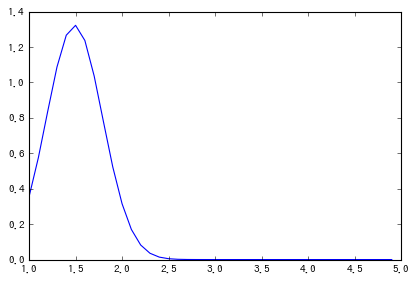

In [39]:
plt.plot(x,y)

In [44]:
def predict(hat_m, lam, lam_mu):
    lam_star = (lam*lam_mu)/(lam+lam_mu)
    return np.random.normal(loc = hat_m, scale=1/np.sqrt(lam), size=100)

In [46]:
predict(hat_m, 1, hat_lam_mu).mean()

1.5187466334224977

# 分散の学習

In [119]:
lam = 2

In [120]:
X = np.random.normal(loc=1, scale=1/np.sqrt(lam), size=10)

In [135]:
X

array([ 0.30740776,  1.38578354,  1.24746728,  0.64872581,  1.70589514,
        1.64252727,  1.40224291, -0.34026267,  0.6482644 ,  0.4081157 ])

In [123]:
def fit(X, mu, a, b):
    # X: real vector
    # lam: precision of X
    # m: mean of prior dist
    # lam_mu: precision of prior dist
    N = X.shape[0]
    hat_a = a + N/2
    hat_b = b + 0.5*((X-mu)**2).sum()
    return hat_a, hat_b

In [124]:
hat_a, hat_b = fit(X, 1, 1, 1)

In [125]:
hat_a, hat_b

(6.0, 3.0782120648111424)

In [126]:
x = np.arange(1, 10, 0.1)
y = gamma.pdf(x, a=hat_a, scale=1/hat_b)

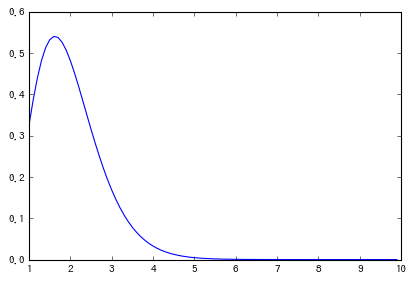

In [127]:
plt.plot(x,y)

In [138]:
def predict(mu, a, b):
    mu_s = mu
    v_s = 2*a
    lam_s = a/b
    X = np.random.standard_t(df=v_s, size=100) * np.sqrt(lam_s) + mu_s
    return X

In [140]:
predict(1, hat_a, hat_b)

array([-0.73781675,  0.69271683,  1.20563892, -1.53968605,  1.25529017,
        1.61562487,  0.41694533,  1.4041279 ,  2.16323277, -1.45591423,
        2.87108744,  2.47704134,  1.28615567,  0.0611744 ,  0.49406732,
        0.7117749 ,  2.11386889,  1.85062204,  0.61031273,  1.89271707,
        0.27074987,  0.96243738, -0.49911282,  1.926606  ,  1.13794913,
        1.19469378,  2.85192181,  0.71807103,  1.64812367, -0.57281431,
        0.04543928,  0.19912289, -0.64165607,  0.62252075,  0.43806761,
        5.60077539,  1.29851652, -0.50554576,  1.67123646,  2.29732751,
        1.61366296, -1.57401026,  2.25157524,  2.62743533,  1.48143916,
        1.21539427, -0.15440649,  2.43367199,  1.55715705,  4.22465241,
        0.33434316,  0.91000773,  1.06926912, -0.80209434,  0.84281001,
        1.33705135, -2.34659431,  1.4285565 ,  1.80272941,  1.25745589,
        0.82254849,  0.13788793,  1.05118969,  1.07625585,  2.06022994,
        4.29171181,  0.95992593,  3.71803617,  1.83510502,  0.43

## 平均と分散の学習

In [28]:
mu = 3
lam = 1

In [29]:
X = np.random.normal(loc=mu, scale=1/np.sqrt(lam), size=10)

In [30]:
X

array([ 2.91166109,  3.13797661,  2.42939904,  2.90783011,  4.73763835,
        2.64689444,  3.18948359,  2.21530962,  4.20735547,  1.86505318])

In [31]:
def fit(X, m, beta, a, b):
    N = X.shape[0]
    hat_beta = beta + N
    hat_m = (X.sum() + beta*m)/ hat_beta
    hat_a = N/2 + a
    hat_b = b + 0.5*((X**2).sum() + beta*(m**2) - hat_beta*(hat_m**2))
    return hat_m, hat_beta, hat_a, hat_b

In [32]:
hat_m, hat_beta, hat_a, hat_b = fit(X, 1, 1, 1, 1)

In [33]:
x = np.arange(1, 5, 0.01)
y = norm.pdf(x, loc=hat_m, scale=1/(hat_beta*lam))

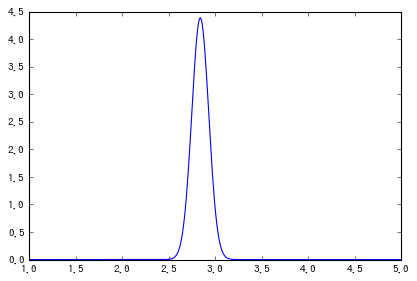

In [34]:
plt.plot(x,y)

In [35]:
x = np.arange(0, 3, 0.01)
y = gamma.pdf(x, a=hat_a, scale=1/hat_b)

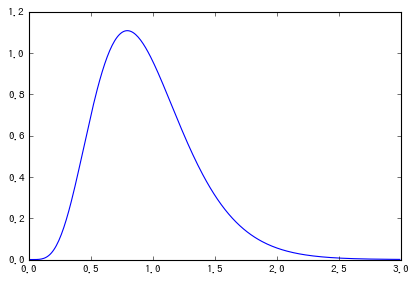

In [36]:
plt.plot(x,y)

In [41]:
def predict(m, beta, a, b):
    mu_s = m
    v_s = 2*a
    lam_s = beta*a/((1+beta)*b)
    X = np.random.standard_t(df=v_s, size=100) * np.sqrt(lam_s) + mu_s
    return X

In [43]:
predict(hat_m, hat_beta, hat_a, hat_b)

array([ 2.84863295,  5.62556509,  2.66116004,  1.61996661,  3.86148918,
        2.50399606,  3.40524835,  2.50701274,  0.36779403,  6.10810165,
        3.35588747,  1.62429245,  2.9102275 ,  3.23233719, -0.50538833,
        1.99359841,  4.16244378,  2.12213589,  1.19775443,  3.41899366,
        3.16511861,  2.74076214,  3.25813357,  4.07543348,  1.99312313,
        1.75030525,  1.60477354,  2.89545233,  1.79257158,  3.78047216,
        2.15642276,  1.60258878,  2.81680327,  3.28846894,  3.29113871,
        2.50238538,  1.97249448,  4.00598758,  3.29887517,  1.61431133,
        3.63440341,  2.14221836,  2.14757942,  2.97819152,  3.24918982,
        1.56562616,  3.56899145,  4.36926015,  3.1318158 ,  2.47846464,
        3.35152584,  2.54352033,  4.11649584,  3.48869436,  2.24708672,
        2.98196687,  2.72135048,  2.65575877,  2.32953838,  2.660297  ,
        2.03391463,  2.09046126,  3.05655816,  3.21527635,  3.44735821,
        2.97182339,  4.93952387,  1.39216154,  3.61922809,  2.59